In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Cargar archivo Excel
file_path = '/content/drive/MyDrive/Colab Notebooks/Topología/Reto/rawsteelproduction.xlsx'

# Lista de hojas (nombres de países)
sheet_names = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Cargar el archivo
xls = pd.ExcelFile(file_path)

### Descripción de los Datos

In [23]:
# Función para analizar una hoja
def analizar_hoja(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Mostrar dimensiones
    #print(f"{sheet}: {df.shape}")
    print(f"🔍 Dimensión del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

    # Análisis por columnas
    resumen = []
    #for col in df.columns:
    #     tipo_dato = df[col].dtype
    #     tipo = 'Numérico' if pd.api.types.is_numeric_dtype(df[col]) else 'Categórico'
    #     n_valores_unicos = df[col].nunique()
    #     valores_unicos = df[col].unique() if n_valores_unicos <= 10 else f"{n_valores_unicos} únicos"
    #     nulos = df[col].isnull().sum()

    #     resumen.append({
    #         "Nombre": col,
    #         "Tipo de dato": tipo_dato,
    #         "Tipo (Cat/Num)": tipo,
    #         "Valores únicos": valores_unicos,
    #         "Valores nulos": nulos
    #     })
    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
        'Valores únicos': df.nunique(),
        'Valores nulos': df.isnull().sum()
    })
    resumen['Tipo (Cat/Num)'] = resumen['Tipo de dato'].apply(
        lambda x: 'Numérico' if pd.api.types.is_numeric_dtype(x) else 'Categórico'
    )

    resumen_df = pd.DataFrame(resumen)
    print("\n📌 Resumen de variables:")
    print(resumen_df)
    print("\n" + "="*50)

In [47]:
# Ejecutar análisis por cada hoja
for sheet in sheet_names:
    analizar_hoja(sheet)


📄 Hoja: Argentina
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores únicos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]             168              0     Categórico
Mid_Value          float64             166              1       Numérico
Mid_Change         float64             167              1       Numérico


📄 Hoja: Brasil
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores únicos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]             168              0     Categórico
Mid_Value          float64             166              1       Numérico
Mid_Change         float64             167              1       Numérico


📄 Hoja: Chile
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores únicos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]             168              0     Categórico
Mi

### Exploración de los Datos

In [42]:
# Función para realizar la exploración de datos
def exploracion_de_datos(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Dividir las columnas en cualitativas y cuantitativas
    cuantitativas = df.select_dtypes(include=['float64', 'int64'])
    temporales = df.select_dtypes(include=['datetime64[ns]'])

    # Análisis para variables cualitativas
    print("\n Distribución de frecuencias para variables cualitativas:")

    # Medidas estadísticas para variables cuantitativas
    print("\n Medidas estadísticas para variables cuantitativas:")

    if not temporales.empty:
        for col in temporales.columns:
            print(f"\nAnálisis de la variable: {col}")
            print(f"- Media temporal (fecha): {temporales[col].mean()}")
            print(f"- Rango de fechas: {temporales[col].min()} - {temporales[col].max()}")

    if not cuantitativas.empty:
        for col in cuantitativas.columns:
            print(f"\nAnálisis de la variable: {col}")

            # Descripción estadística con describe()
            desc = cuantitativas[col].describe()
            print(desc)

            # Cuartiles y Rango Intercuartílico (IQR)
            Q1 = desc['25%']
            Q3 = desc['75%']
            IQR = Q3 - Q1
            print(f"- Rango intercuartílico (IQR): {IQR}")

            # Outliers
            outliers = cuantitativas[(cuantitativas[col] < (Q1 - 1.5 * IQR)) | (cuantitativas[col] > (Q3 + 1.5 * IQR))]
            print(f"- Outliers detectados: {outliers.shape[0]}")

            # Boxplot
            print("\n")
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=cuantitativas[col])
            plt.title(f"Boxplot de {col}")
            plt.show()

            # Histograma para distribución de datos
            plt.figure(figsize=(6, 4))
            sns.histplot(cuantitativas[col], kde=True, bins=20)
            plt.title(f"Histograma de {col}")
            plt.show()

    # Análisis de correlación (Mapa de calor)
    print("\n Análisis de correlación de las variables cuantitativas:")
    if not cuantitativas.empty and cuantitativas.shape[1] > 1:
        corr_matrix = cuantitativas.corr()
        plt.figure(figsize=(4, 3))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Mapa de calor de la correlación entre variables cuantitativas")
        plt.show()

    print("\n" + "="*40)


📄 Hoja: Argentina

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    167.000000
mean     401.317796
std       64.247565
min      107.125000
25%      357.540000
50%      413.299000
75%      450.982500
max      505.860000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 93.4425
- Outliers detectados: 2




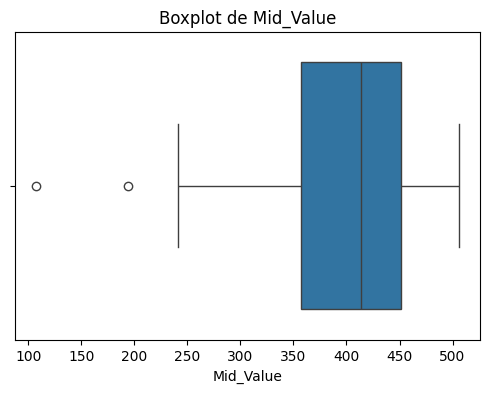

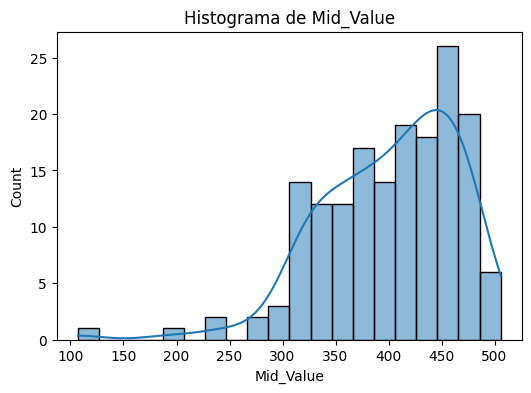


Análisis de la variable: Mid_Change
count    167.000000
mean       0.956218
std       14.163811
min      -62.570274
25%       -5.924833
50%       -0.680323
75%        6.161250
max       81.371295
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 12.086082700110339
- Outliers detectados: 10




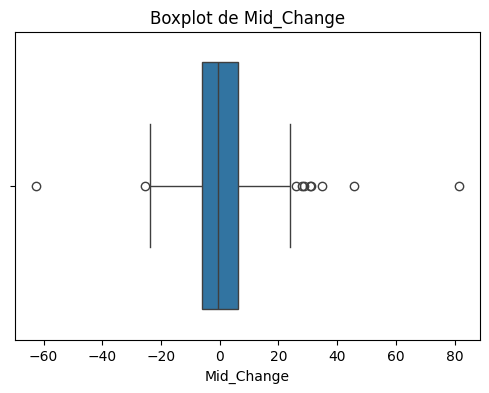

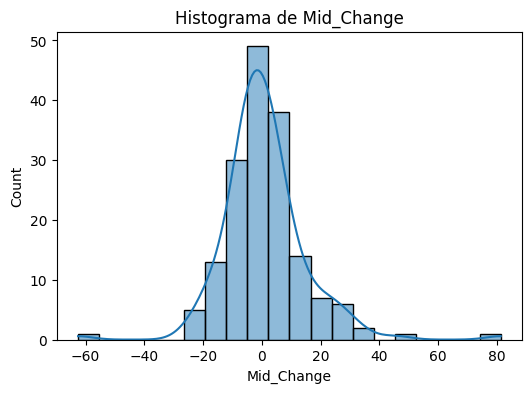


 Análisis de correlación de las variables cuantitativas:


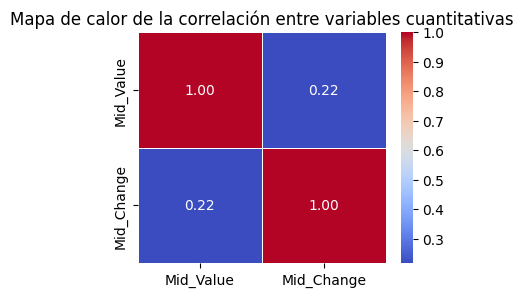



📄 Hoja: Brasil

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count     167.000000
mean     2815.751875
std       211.269007
min      1929.293000
25%      2695.801000
50%      2841.000000
75%      2973.000000
max      3269.000000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 277.19900000000007
- Outliers detectados: 3




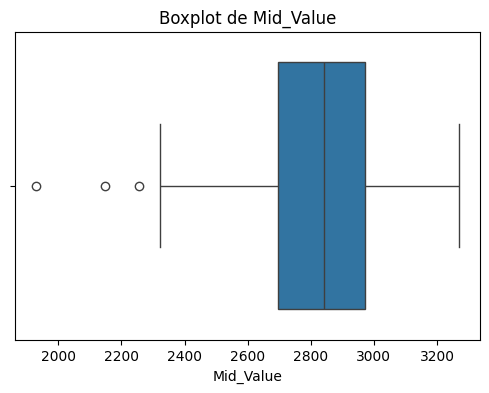

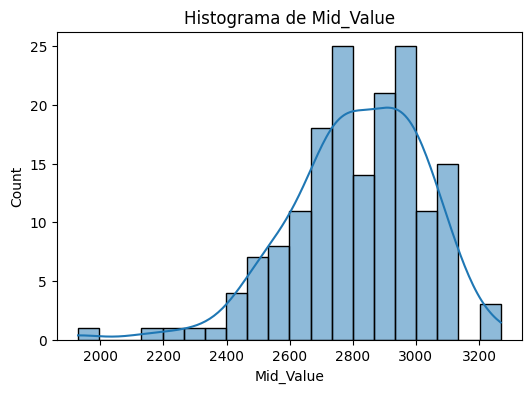


Análisis de la variable: Mid_Change
count    167.000000
mean       0.288892
std        7.570863
min      -29.125481
25%       -5.168526
50%        0.173447
75%        4.646060
max       22.250429
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 9.814586062562306
- Outliers detectados: 2




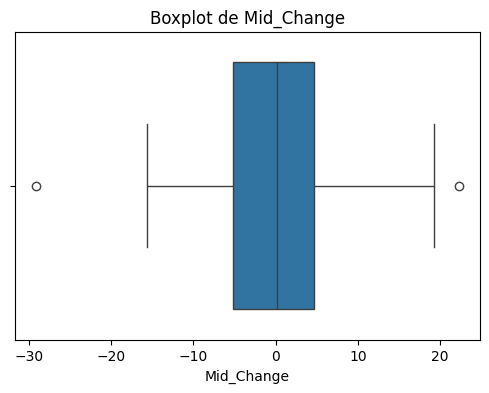

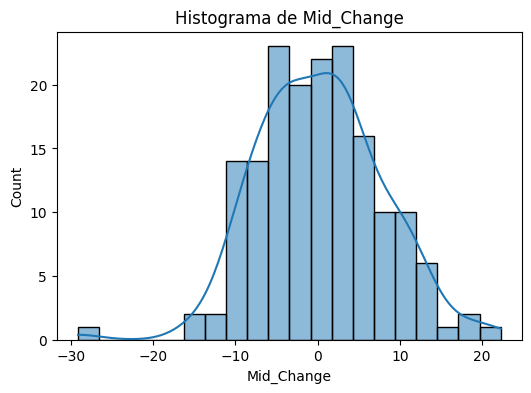


 Análisis de correlación de las variables cuantitativas:


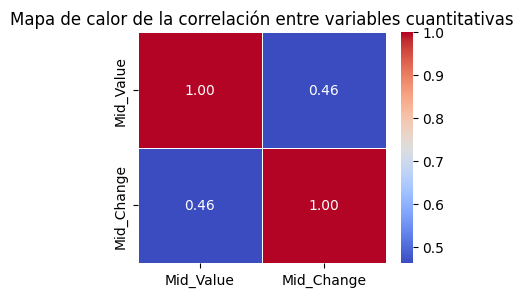



📄 Hoja: Chile

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    167.000000
mean     101.563499
std       21.865012
min       35.509000
25%       92.280442
50%       98.959270
75%      109.369105
max      156.543000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 17.088663850000017
- Outliers detectados: 26




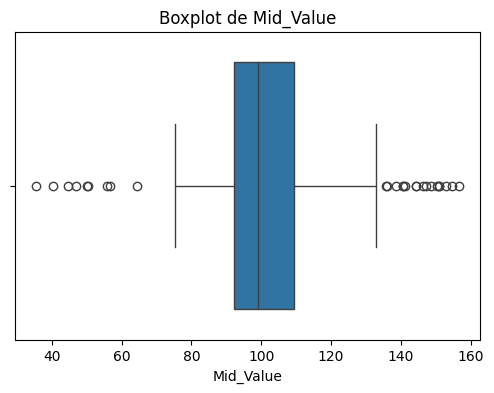

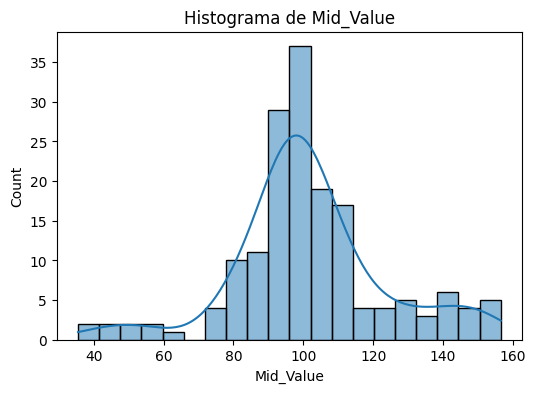


Análisis de la variable: Mid_Change
count    167.000000
mean       1.518798
std       22.673820
min      -53.588406
25%      -10.925580
50%       -1.521663
75%        9.287849
max      128.659581
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 20.213428427872955
- Outliers detectados: 10




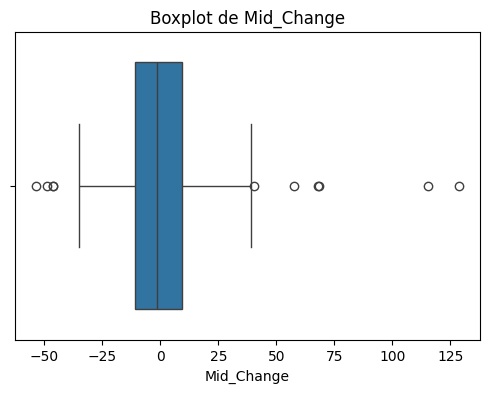

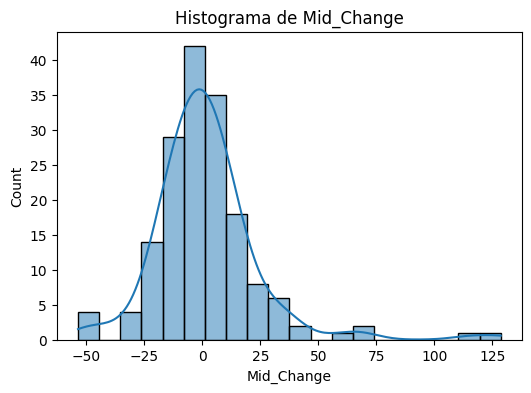


 Análisis de correlación de las variables cuantitativas:


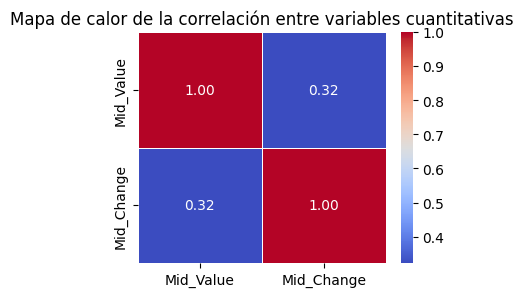



📄 Hoja: Colombia

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    143.000000
mean     106.720739
std       14.593539
min       33.089406
25%      100.202000
50%      108.000000
75%      115.783297
max      133.447000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 15.581297045454548
- Outliers detectados: 4




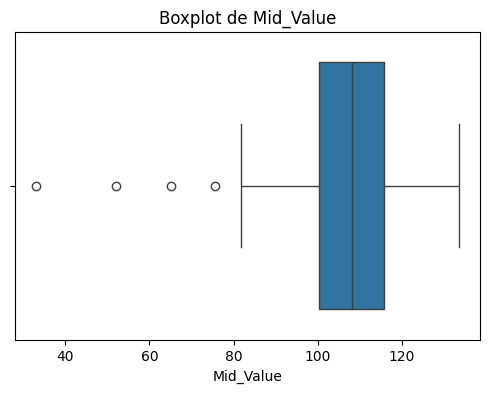

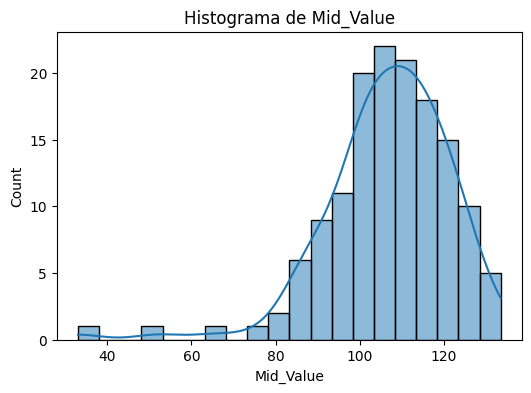


Análisis de la variable: Mid_Change
count    142.000000
mean       1.084276
std       17.724803
min      -66.799812
25%       -7.138516
50%       -0.023112
75%        7.342149
max       96.909441
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 14.480664560264621
- Outliers detectados: 10




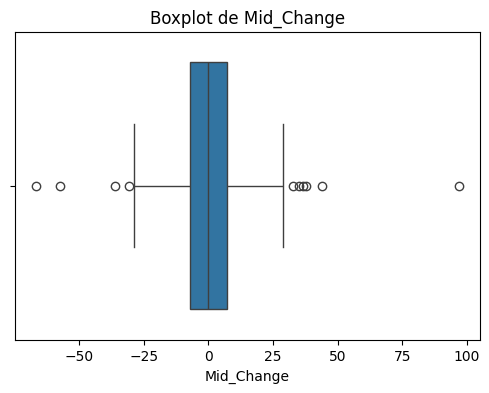

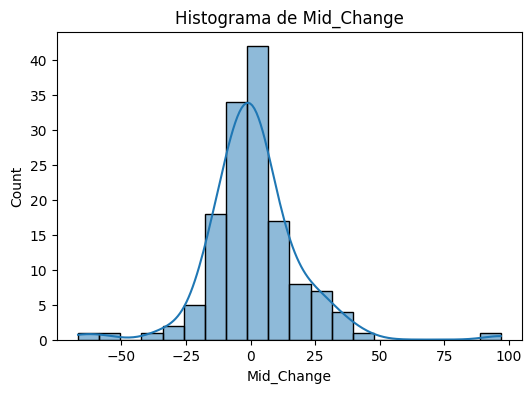


 Análisis de correlación de las variables cuantitativas:


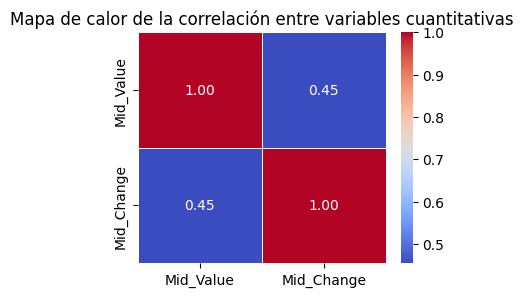



📄 Hoja: Mexico

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count     167.000000
mean     1505.220338
std       160.502973
min       920.284000
25%      1421.062500
50%      1537.031000
75%      1624.618500
max      1844.093208
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 203.55600000000004
- Outliers detectados: 4




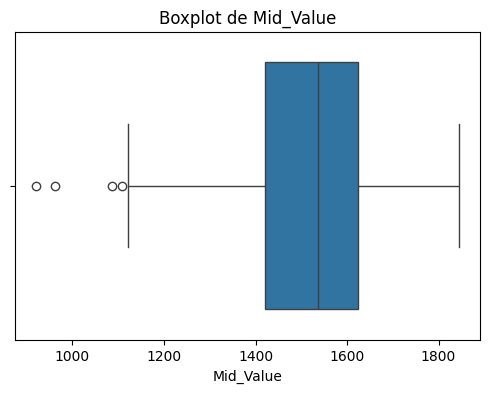

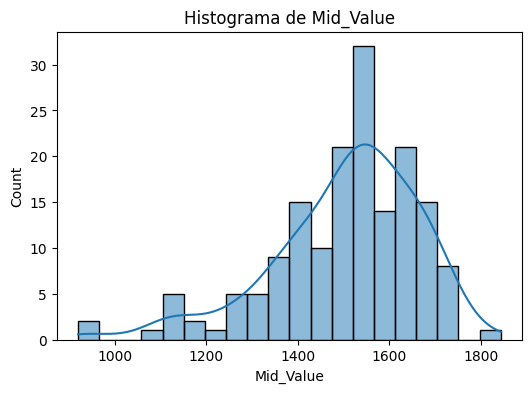


Análisis de la variable: Mid_Change
count    167.000000
mean       0.110319
std        7.660771
min      -19.977719
25%       -4.177207
50%       -0.467046
75%        4.517733
max       33.853308
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 8.694939732443164
- Outliers detectados: 6




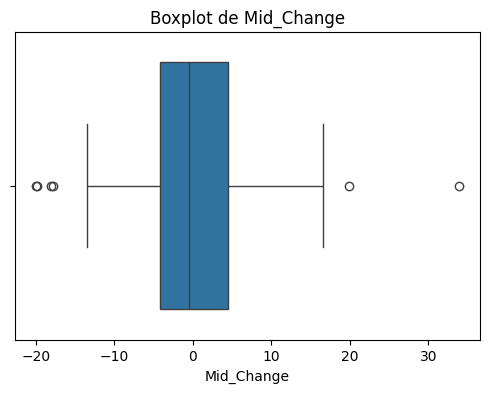

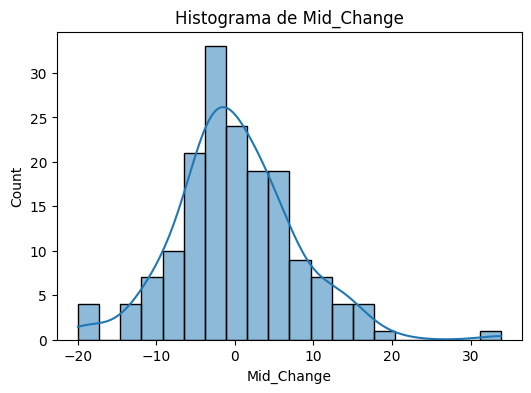


 Análisis de correlación de las variables cuantitativas:


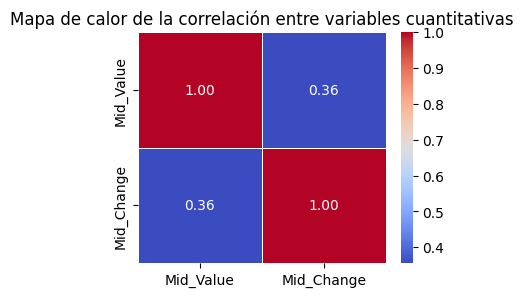



📄 Hoja: Peru

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    165.000000
mean     102.672285
std       26.542110
min       14.089109
25%       89.300000
50%       99.843587
75%      118.732791
max      181.824833
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 29.432790544474514
- Outliers detectados: 8




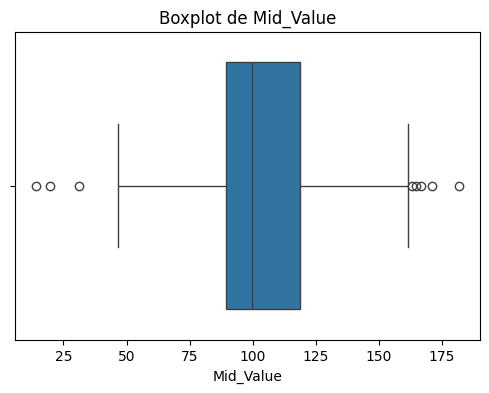

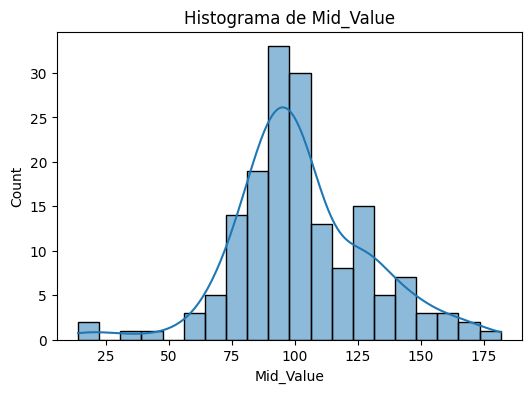


Análisis de la variable: Mid_Change
count    164.000000
mean       2.713667
std       16.573155
min      -35.278807
25%       -5.384460
50%       -0.307276
75%        9.629802
max       57.285714
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 15.014262045566019
- Outliers detectados: 18




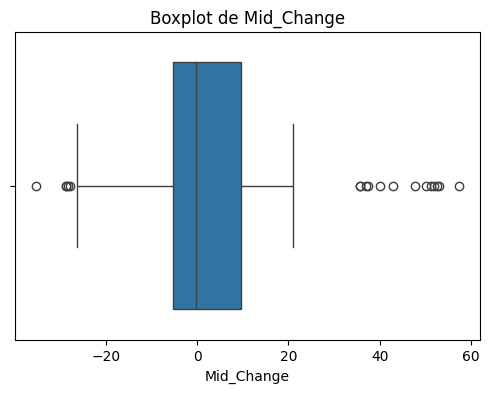

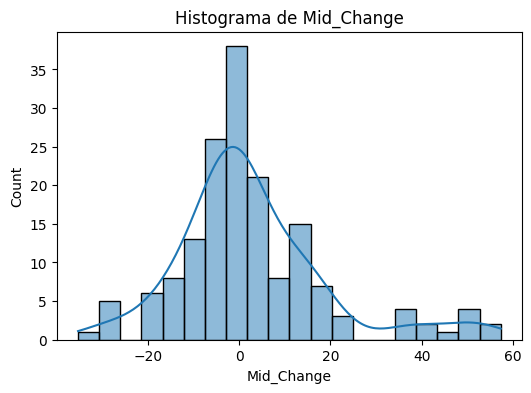


 Análisis de correlación de las variables cuantitativas:


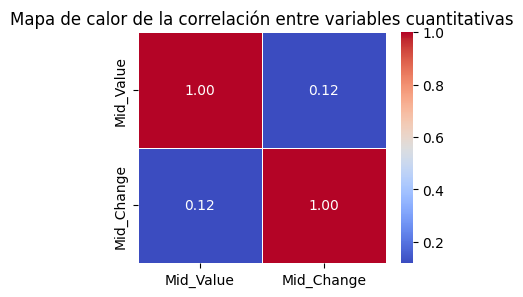

In [48]:
# Ejecutar el análisis para cada hoja
for sheet in sheet_names:
    exploracion_de_datos(sheet)